In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
# Read in the data
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

### EDA

In [3]:
# Check the shapes
train.shape, test.shape

((1168, 81), (292, 80))

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [5]:
# Get a rough overview of the training data
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,954.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1161.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,70.98847,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.310078,444.726027,...,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,24.82875,8957.442311,1.390153,1.124343,30.145255,20.785185,182.595606,462.664785,...,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.00000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.00000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.00000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,80.00000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,...,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.00000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
# Get a look at the column names and object types
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

We don't need the Id column for the Training Set so we drop it (it'd act as an unnecessary feature otherwise).

In [7]:
# Drop the ID column
train.drop('Id', axis=1, inplace=True)

In [9]:
# Collect the names of the Categorical and Numeric Variables seperately
num_columns = train.select_dtypes(include=np.number).columns.tolist()
num_columns.remove("SalePrice") # Capturing feature names exclusively
cat_columns = train.select_dtypes(exclude=np.number).columns.tolist()

Other than collecting the names of features based on what kind of data they store, we can also find a number of features with similar names. Specifically there are four keywords that are repeated a few times so they may require similar Engineering or special treatment.

In [10]:
# Explore Categorical Columns
# Explore overlapping variable names
repetitive = ["Bsmt", "Garage", "Sale", "Kitchen"]
similar_cols = []
print("Looking for highly similar variable names")
print('--'*30)
for col in (num_columns + cat_columns):
    if any(x in col for x in repetitive):
        print(col)
        similar_cols.append(col)


Looking for highly similar variable names
------------------------------------------------------------
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
BsmtFullBath
BsmtHalfBath
KitchenAbvGr
GarageYrBlt
GarageCars
GarageArea
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
KitchenQual
GarageType
GarageFinish
GarageQual
GarageCond
SaleType
SaleCondition


The Cardinality of a Feature refers to the number of Unique Values in that set. We should be on the lookout for:

-High Cardinality Categorical Variables: for example, if Zipcodes were not stored as numbers, it could cause a Transformer like OneHotEncoder to explode
-Low Cardinality Numeric Variables: for instance, if a feature had values [1,2,3,4,5], we could create new useful features out of it

In [11]:
# Check the cardinality of each of these variables
print("Looking at Categorical Variable Cardinalities")
print('--'*30)
for col in cat_columns:
    uniques = train[col].unique()
    if len(uniques) > 10:
        print(f"{len(uniques)} values in {col}")
    else:
        print(f"{len(uniques)} values in {col}: {uniques}")

Looking at Categorical Variable Cardinalities
------------------------------------------------------------
5 values in MSZoning: ['RL' 'RM' 'FV' 'RH' 'C (all)']
2 values in Street: ['Pave' 'Grvl']
3 values in Alley: [nan 'Grvl' 'Pave']
4 values in LotShape: ['IR1' 'Reg' 'IR2' 'IR3']
4 values in LandContour: ['Lvl' 'Bnk' 'HLS' 'Low']
1 values in Utilities: ['AllPub']
5 values in LotConfig: ['Inside' 'CulDSac' 'FR2' 'Corner' 'FR3']
3 values in LandSlope: ['Gtl' 'Mod' 'Sev']
25 values in Neighborhood
9 values in Condition1: ['Norm' 'Feedr' 'RRAn' 'PosA' 'RRAe' 'Artery' 'PosN' 'RRNe' 'RRNn']
8 values in Condition2: ['Norm' 'RRAe' 'Feedr' 'PosN' 'Artery' 'RRNn' 'PosA' 'RRAn']
5 values in BldgType: ['TwnhsE' '1Fam' 'Duplex' 'Twnhs' '2fmCon']
8 values in HouseStyle: ['1Story' '2Story' '1.5Fin' 'SFoyer' '1.5Unf' 'SLvl' '2.5Fin' '2.5Unf']
6 values in RoofStyle: ['Gable' 'Flat' 'Hip' 'Shed' 'Gambrel' 'Mansard']
8 values in RoofMatl: ['CompShg' 'Tar&Grv' 'WdShngl' 'WdShake' 'Roll' 'ClyTile' 'Meta

In [12]:
# Are there any low cardinality numeric variables?
print("Checking for Low Cardinality Numeric Variables")
print("--"*30)
for col in num_columns:
    uniques = train[col].unique()
    if len(uniques) < 20:
        print(f"{len(uniques)} unique values in {col}: {sorted(uniques)}")

Checking for Low Cardinality Numeric Variables
------------------------------------------------------------
15 unique values in MSSubClass: [20, 30, 40, 45, 50, 60, 70, 75, 80, 85, 90, 120, 160, 180, 190]
10 unique values in OverallQual: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
9 unique values in OverallCond: [1, 2, 3, 4, 5, 6, 7, 8, 9]
4 unique values in BsmtFullBath: [0, 1, 2, 3]
3 unique values in BsmtHalfBath: [0, 1, 2]
4 unique values in FullBath: [0, 1, 2, 3]
3 unique values in HalfBath: [0, 1, 2]
8 unique values in BedroomAbvGr: [0, 1, 2, 3, 4, 5, 6, 8]
4 unique values in KitchenAbvGr: [0, 1, 2, 3]
12 unique values in TotRmsAbvGrd: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14]
4 unique values in Fireplaces: [0, 1, 2, 3]
5 unique values in GarageCars: [0, 1, 2, 3, 4]
18 unique values in 3SsnPorch: [0, 23, 96, 130, 140, 144, 153, 162, 168, 180, 182, 196, 216, 238, 245, 290, 304, 508]
8 unique values in PoolArea: [0, 480, 512, 519, 555, 576, 648, 738]
12 unique values in MoSold: [1, 2, 3, 4, 5, 

<AxesSubplot:>

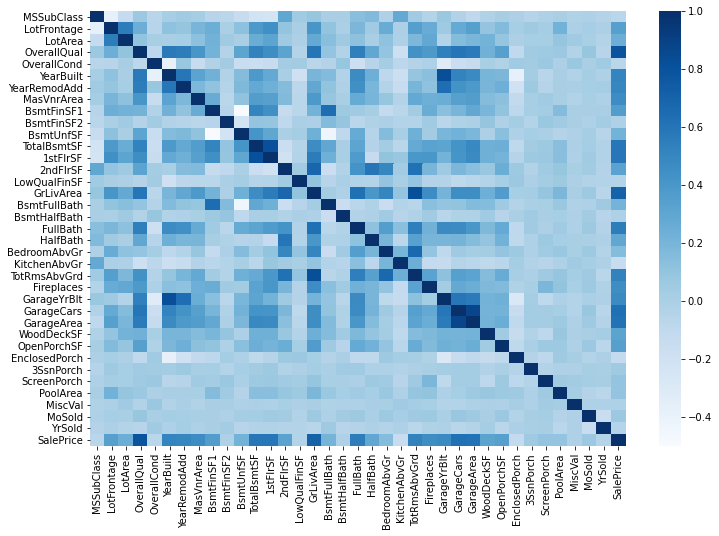

In [13]:
# Explore which numeric columns have high linear correlation
corr_matrix = train.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap='Blues')

In [14]:
# Sort the highest linear correlations with target variable
target_var = "SalePrice"
corr_matrix[target_var].apply(lambda x: abs(x)).sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.789185
GrLivArea        0.707300
GarageCars       0.628329
GarageArea       0.619000
TotalBsmtSF      0.595042
1stFlrSF         0.587642
FullBath         0.554988
TotRmsAbvGrd     0.528363
YearBuilt        0.514408
YearRemodAdd     0.507831
GarageYrBlt      0.474346
MasVnrArea       0.466386
Fireplaces       0.459611
BsmtFinSF1       0.362874
LotFrontage      0.341294
OpenPorchSF      0.339500
2ndFlrSF         0.330386
WoodDeckSF       0.315444
HalfBath         0.295592
LotArea          0.249499
BsmtUnfSF        0.215724
BsmtFullBath     0.212924
BedroomAbvGr     0.158281
KitchenAbvGr     0.132108
EnclosedPorch    0.115004
PoolArea         0.103280
ScreenPorch      0.100284
MoSold           0.072764
OverallCond      0.065642
MSSubClass       0.060775
3SsnPorch        0.060119
YrSold           0.045508
LowQualFinSF     0.032381
MiscVal          0.013071
BsmtHalfBath     0.011109
BsmtFinSF2       0.010151
Name: SalePrice, dtype: float64

We find that the two features OverallQual and GrLivArea are the most linearly correlated with our target so we can choose to explore them a bit further.

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

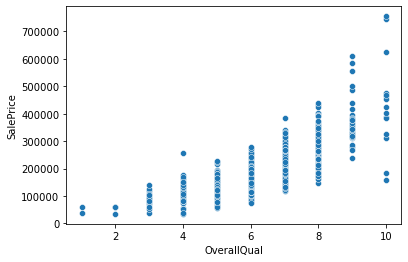

In [15]:
# Explore the second variable (notice the significant Linear Correlation)
sns.scatterplot(x="OverallQual", y="SalePrice", data=train)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

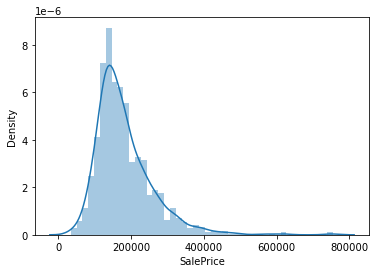

In [16]:
# Explore the Distribution of the Target Variable
sns.distplot(train[target_var])

In [17]:
# Where do most values lie under? Explore the Percentiles.
for i in range(95,100):
    print(f"{i}% of the target values lie under: {int(np.percentile(train[target_var], i))}")
print(f"Critical Values:\n\tMax:{train[target_var].max()}\n\tMin:{train[target_var].min()}")

95% of the target values lie under: 325000
96% of the target values lie under: 339830
97% of the target values lie under: 361899
98% of the target values lie under: 392330
99% of the target values lie under: 443943
Critical Values:
	Max:755000
	Min:34900


In [18]:
# We can get rid of Outliers by setting some thresholds
upper_thresh = 38500
train[train[target_var] > upper_thresh][target_var] = upper_thresh

Before Log Transform: Skewness 1.951367548938153
After Log Transform: Skewness 0.07351540489641191
Applying Inverse Transformation: Skewness 1.9513675489381535
Final Skewness: 0.07351540489641191


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

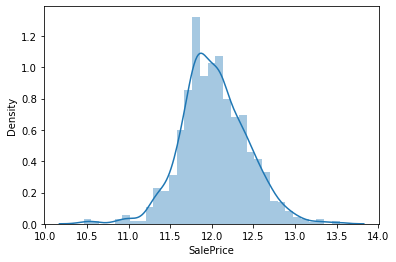

In [20]:
# Log Transform to reduce skewness of the Target Distribution
from scipy import stats

print(f"Before Log Transform: Skewness {stats.skew(train.SalePrice)}")
train["SalePrice"] = np.log1p(train["SalePrice"])
print(f"After Log Transform: Skewness {stats.skew(train.SalePrice)}")
# y = np.expm1(y)
print(f"Applying Inverse Transformation: Skewness {stats.skew(np.expm1(train.SalePrice))}") 
print(f"Final Skewness: {stats.skew(train.SalePrice)}")
sns.distplot(train["SalePrice"])

In [22]:
X = train.drop(target_var, axis=1)
y = train[target_var]
X.shape, y.shape

((1168, 79), (1168,))

<AxesSubplot:>

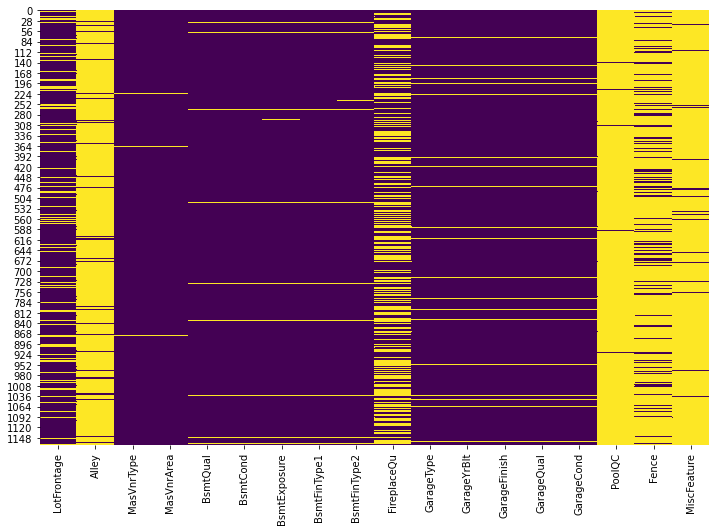

In [24]:
# Get a visual of how many values are missing
missing_count = X.isnull().sum()
missing_count = missing_count[missing_count > 0]
missing_cols = pd.DataFrame(missing_count).index.tolist()
plt.figure(figsize=(12,8))
sns.heatmap(X[missing_cols].isnull(), cmap='viridis', cbar=False)

In [25]:
# Get actual numbers 
missing_count.sort_values(ascending=False) / len(X) * 100

PoolQC          99.400685
MiscFeature     96.232877
Alley           93.407534
Fence           79.708904
FireplaceQu     47.174658
LotFrontage     18.321918
GarageYrBlt      5.479452
GarageType       5.479452
GarageFinish     5.479452
GarageQual       5.479452
GarageCond       5.479452
BsmtExposure     2.654110
BsmtFinType2     2.654110
BsmtFinType1     2.568493
BsmtCond         2.568493
BsmtQual         2.568493
MasVnrArea       0.599315
MasVnrType       0.599315
dtype: float64

The variable PoolQC has enough values that we could be lazy and drop the entire column, but it may be of benefit to us if we fill the missing values with 0 since the values may just not exist.

We can apply similar thinking to the features related to the Garage and Basements of these houses.

In [26]:
# Which missing value columns are numeric and which are categorical
print(X[missing_cols].dtypes)
X[missing_cols].head(10)

LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object


,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,NaN,NaN,None,0.0,Gd,TA,No,ALQ,Unf,TA,Attchd,1977.0,RFn,TA,TA,NaN,NaN,NaN
1,95.0,NaN,None,0.0,TA,Gd,Gd,ALQ,Rec,TA,Attchd,1970.0,Unf,TA,TA,NaN,NaN,NaN
2,92.0,NaN,None,0.0,Gd,TA,Av,GLQ,Unf,TA,Attchd,1997.0,Unf,TA,TA,NaN,NaN,NaN
3,105.0,NaN,BrkFace,480.0,Gd,TA,No,BLQ,Unf,TA,Attchd,1977.0,RFn,TA,TA,NaN,MnPrv,NaN
4,NaN,NaN,Stone,126.0,Gd,TA,No,ALQ,Unf,TA,Attchd,1977.0,Fin,TA,TA,NaN,NaN,NaN
5,58.0,NaN,None,0.0,Gd,TA,Av,Unf,Unf,Gd,BuiltIn,2006.0,Fin,TA,TA,NaN,NaN,NaN
6,NaN,NaN,BrkFace,180.0,Gd,TA,No,ALQ,Unf,Gd,Detchd,1957.0,Unf,TA,TA,NaN,NaN,NaN
7,88.0,NaN,BrkCmn,67.0,TA,TA,No,Rec,BLQ,TA,Attchd,1957.0,RFn,TA,TA,NaN,GdPrv,NaN
8,70.0,NaN,None,0.0,TA,TA,No,ALQ,GLQ,NaN,Detchd,1965.0,Unf,Fa,Fa,NaN,GdPrv,Shed
9,80.0,NaN,None,0.0,TA,TA,No,Rec,Unf,NaN,Detchd,1947.0,Unf,TA,TA,NaN,NaN,NaN


In [27]:
# Define a function for Data Cleaning
def handle_missing(df):
    # LotFrontage, MasVnrArea are generic numeric features so we can fill with the median
    cols = ['LotFrontage', 'MasVnrArea']
    for col in cols:
        df[col] = df[col].fillna(df[col].median())
    
    # Some features have missing values because one does not exist for that instance
    none_fill_cols = "Alley BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Electrical FireplaceQu GarageType GarageFinish GarageQual GarageCond PoolQC Fence MiscFeature".split()
    df[none_fill_cols] = df[none_fill_cols].fillna('NONE')
    
    # Deal with Electrical, MasVnrType and GarageYrBlt
    df['Electrical'] = df['Electrical'].fillna("SBrkr") # This is the average
    df['MasVnrType'] = df['MasVnrType'].fillna(df.MasVnrType.mode()) # The mode makes more sense based on feature description
    df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0) # This house instance has no garage
    
    # If the testing data has any surprises, we can apply a generic strategy
    num_cols = df.select_dtypes(include=np.number).columns
    cat_cols = df.select_dtypes(exclude=np.number).columns
    for col in num_cols:
        df[col] = df[col].fillna(df[col].median())
    for col in cat_cols:
        df[col] = df[col].fillna('NONE')
    
    return df
    
# Apply this to a copy of the DataFrame and check
tmp = X.copy()
tmp = handle_missing(tmp)
tmp.isnull().sum()[tmp.isnull().sum() > 0]

Series([], dtype: int64)

In [28]:
# Apply this to the actual data
X = handle_missing(X)
X.isnull().sum().max()

0

Feature Engineering and Feature Selection
Some aspects of Feature Engineering include:

Create Aggregated Features (can result in more robust models, as will be seen later)
Dealing with heavily Skewed features (either dropping them, transforming them or doing nothing)
Scaling/Normalizing numeric variables (really only required for non-Tree-based algorithms like SVMs, Linear Regression, MLP etc.)
Encodings for Categorical Variables (the only thing that's necessary to carry out here)

In [29]:
# Some interesting features we can create
def new_features(X):
    X['HasWoodDeck'] = (X['WoodDeckSF'] == 0) * 1

    X['HasOpenPorch'] = (X['OpenPorchSF'] == 0) * 1
    X['HasEnclosedPorch'] = (X['EnclosedPorch'] == 0) * 1
    X['Has3SsnPorch'] = (X['3SsnPorch'] == 0) * 1
    X['HasScreenPorch'] = (X['ScreenPorch'] == 0) * 1

    X['Total_Home_Quality'] = X['OverallQual'] + X['OverallCond']
    X['TotalSF'] = X['TotalBsmtSF'] + X['1stFlrSF'] + X['2ndFlrSF']
    X['TotalSquareFootage'] = (X['BsmtFinSF1'] + X['BsmtFinSF2'] + X['1stFlrSF'] + X['2ndFlrSF'])

    X['HasPool'] = X['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
    X['Has2ndFloor'] = X['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
    X['HasGarage'] = X['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
    X['HasBsmt'] = X['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
    X['HasFireplace'] = X['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
    
    return X

X  = new_features(X)
len(X.columns)

92

In [30]:
# Find the heavily skewed features
num_columns = X.select_dtypes(include=np.number).columns
skewed_features = X[num_columns].apply(lambda x: abs(stats.skew(x))).sort_values(ascending=False)
high_skewed = skewed_features[skewed_features > 0.5]
high_skewed 

MiscVal               23.036310
PoolArea              13.226697
HasPool               12.800905
LotArea               10.645591
3SsnPorch              9.758059
LowQualFinSF           8.655009
Has3SsnPorch           7.078849
HasBsmt                5.996640
BsmtFinSF2             4.360220
KitchenAbvGr           4.359651
BsmtHalfBath           4.258924
ScreenPorch            4.100466
HasGarage              3.912540
GarageYrBlt            3.893686
HasScreenPorch         3.063213
EnclosedPorch          3.039700
MasVnrArea             2.832075
LotFrontage            2.729928
OpenPorchSF            2.407743
TotalSquareFootage     2.388755
HasEnclosedPorch       2.020003
TotalSF                2.009080
BsmtFinSF1             1.869201
TotalBsmtSF            1.742350
1stFlrSF               1.511763
WoodDeckSF             1.502996
GrLivArea              1.448089
MSSubClass             1.420192
BsmtUnfSF              0.907889
2ndFlrSF               0.822421
Fireplaces             0.671102
HalfBath

We can set some threshold above which the filtered features will undergo a Logarithmic Transformation but a couple of the features justify their high skewness; e.g. only a few luxury homes have pools so there would naturally be outliers and a pulled distribution.

In [31]:
# Label Encode a copy of the data
from sklearn import preprocessing
cat_columns = X.select_dtypes(exclude=np.number).columns
fi_data = X.copy()
for feat in cat_columns:
    fi_data[feat] = preprocessing.LabelEncoder().fit_transform(fi_data[feat])
# Use a RandomForest model to look at the Feature Importances 
from sklearn.ensemble import RandomForestRegressor
forest_fi = RandomForestRegressor(n_estimators=100,
                                 min_samples_leaf=5,
                                 min_samples_split=5,
                                 n_jobs=-1).fit(fi_data, y)

In [32]:
# Extract and visualize the importances
importances = forest_fi.feature_importances_
feat_imps = pd.Series(importances, index=fi_data.columns)
feat_imps

MSSubClass      0.000943
MSZoning        0.003387
LotFrontage     0.004031
LotArea         0.007033
Street          0.000000
                  ...   
HasPool         0.000000
Has2ndFloor     0.000039
HasGarage       0.000001
HasBsmt         0.000000
HasFireplace    0.001104
Length: 92, dtype: float64

In [33]:
# Check the top 10 most relevant features to the target variable
feat_imps = feat_imps.sort_values(ascending=False)
feat_imps[:10]

OverallQual           0.462293
TotalSF               0.279072
TotalSquareFootage    0.083787
Total_Home_Quality    0.025532
CentralAir            0.011978
YearBuilt             0.010415
GarageArea            0.010406
GrLivArea             0.010016
GarageYrBlt           0.008542
YearRemodAdd          0.008415
dtype: float64

<AxesSubplot:title={'center':'Feature Importances after Engineering'}>

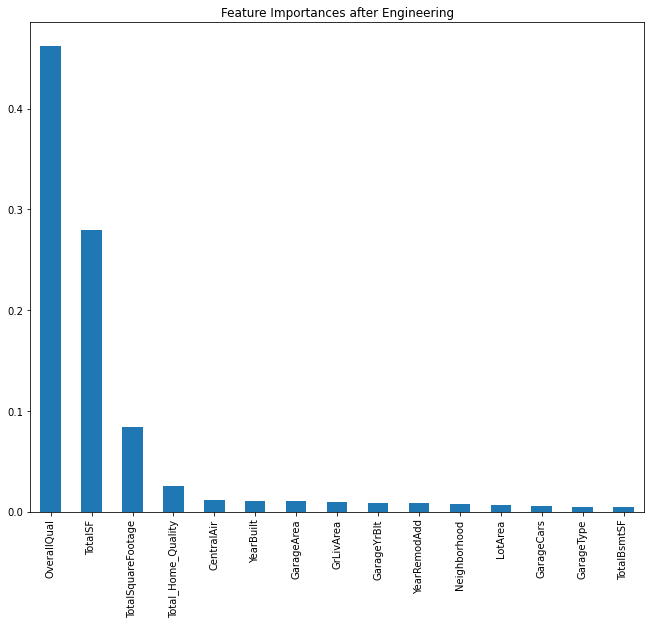

In [34]:
# Visualize the importances
plt.figure(figsize=(11,9))
plt.title("Feature Importances after Engineering")
feat_imps[:15].plot.bar()

Incredible. Three of our aggregated features are among the best that can be used for predicting the Target Variable.

The OverallQual feature still reigns the highest and by a significant margin at that. Other than that we can also see the YearBuilt feature among the top predictors which implies that the later a house was built, the price tended to increase a lot more.

Another interesting note is that there are no Basement related features in this top-15 list, but there are a number of Garage related features. This could imply that in practice, Garages are more valuable than Basements which makes sense.

In [55]:
from sklearn.compose import ColumnTransformer
from sklearn import preprocessing
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
test_ids = test_data.Id # TEST IDS STORED HERE!

# Scale and seperate Target Variable
target_var = 'SalePrice'
train_data[target_var] = np.log1p(train_data[target_var]) # TARGET SCALED HERE!
X = train_data.drop(['Id', target_var], axis=1)
y = train_data[target_var]
X_test = test_data.drop('Id', axis=1,inplace=True)

# Data Cleaning
X = handle_missing(X)
X_test = handle_missing(test_data)

# Feature Engineering
X = new_features(X)
X_test = new_features(X_test)

# Pipelines
num_columns = X.select_dtypes(include=np.number).columns
cat_columns = X.select_dtypes(exclude=np.number).columns
pipeline = ColumnTransformer([
    ("one_hot_encoder", preprocessing.OneHotEncoder(sparse=False, handle_unknown='ignore'), cat_columns),
    ("standard_scaler", preprocessing.StandardScaler(), num_columns)
])
X = pipeline.fit_transform(X)
X_test = pipeline.transform(X_test) # Making sure to not fit to the testing set

In [56]:
X.shape, y.shape, X_test.shape

((1168, 313), (1168,), (292, 313))

### Finding the Best Random State

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=i)
    lg=LinearRegression()
    lg.fit(x_train,y_train)
    predrf=lg.predict(x_test)
    acc=r2_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)    

Best accuracy is  0.905880709370983  on Random_state  135


In [40]:
#Splitting the data into training and testing datasets
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=maxRS)

In [41]:
from sklearn.svm import SVR 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.ensemble import RandomForestRegressor 

### Model Evaluation

In [42]:
model=[DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),RandomForestRegressor(),LinearRegression()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print(m)
    print(m.score(x_train,y_train))
    print("error: ")
    print("Mean absolute error: ",mean_absolute_error(y_test,predm))
    print("Mean squared error: ",mean_squared_error(y_test,predm))
    print("Root mean squared error: ",np.sqrt(mean_squared_error(y_test,predm)))
    print("r2_score",r2_score(y_test,predm))
    print("\n\n")

DecisionTreeRegressor()
1.0
error: 
Mean absolute error:  0.13696991124085584
Mean squared error:  0.037568817732021476
Root mean squared error:  0.19382677248517935
r2_score 0.8141046430356241



KNeighborsRegressor()
0.8521820071641155
error: 
Mean absolute error:  0.13550054994198135
Mean squared error:  0.039799973297178284
Root mean squared error:  0.19949930650801342
r2_score 0.803064597453504



SVR()
0.957275060066545
error: 
Mean absolute error:  0.1066701532501172
Mean squared error:  0.029996839388595053
Root mean squared error:  0.17319595661733866
r2_score 0.8515717687545691



RandomForestRegressor()
0.9775421294038258
error: 
Mean absolute error:  0.09540183418773314
Mean squared error:  0.0222482972552489
Root mean squared error:  0.14915863117918754
r2_score 0.8899125548848753



LinearRegression()
0.9449973115651308
error: 
Mean absolute error:  0.09892496522927209
Mean squared error:  0.019021187685641393
Root mean squared error:  0.13791732192020476
r2_score 0.90588

### Cross-Val Score

In [43]:
#Checking the cross val score
from sklearn.model_selection import cross_val_score
for m in model:
    for j in range(2,10):
        cv_score=cross_val_score(m,X,y,cv=j)
        cv_mean=cv_score.mean()
        print(m)
        print(f'At cross fold {j} the cv score is {cv_mean}')
        print("\n")

DecisionTreeRegressor()
At cross fold 2 the cv score is 0.7048388734469566


DecisionTreeRegressor()
At cross fold 3 the cv score is 0.7245387189285711


DecisionTreeRegressor()
At cross fold 4 the cv score is 0.7192230130625068


DecisionTreeRegressor()
At cross fold 5 the cv score is 0.7649482033071893


DecisionTreeRegressor()
At cross fold 6 the cv score is 0.7555435086688109


DecisionTreeRegressor()
At cross fold 7 the cv score is 0.7577526251715775


DecisionTreeRegressor()
At cross fold 8 the cv score is 0.7461946111698395


DecisionTreeRegressor()
At cross fold 9 the cv score is 0.7290757159564746


KNeighborsRegressor()
At cross fold 2 the cv score is 0.7819225104694383


KNeighborsRegressor()
At cross fold 3 the cv score is 0.789507732462055


KNeighborsRegressor()
At cross fold 4 the cv score is 0.7900293464505608


KNeighborsRegressor()
At cross fold 5 the cv score is 0.7953919242532954


KNeighborsRegressor()
At cross fold 6 the cv score is 0.7940401898010729


KNeighbors

### Regularization

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.001, 'random_state': 0}


In [45]:
ls=Lasso(alpha=0.001,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
predls=ls.predict(x_test)
lss=r2_score(y_test,predls)
print('r2_score:', lss)
print("error: ")
print("Mean absolute error: ",mean_absolute_error(y_test,predls))
print("Mean squared error: ",mean_squared_error(y_test,predls))
print("Root mean squared error: ",np.sqrt(mean_squared_error(y_test,predls)))

r2_score: 0.9045709552681456
error: 
Mean absolute error:  0.08878002099116579
Mean squared error:  0.01928588452351183
Root mean squared error:  0.138873627890654


In [46]:
cv_score=cross_val_score(ls,X,y,cv=2)
cv_mean=cv_score.mean()
cv_mean

0.8429888692569256

### Hyperparameter Tuning

In [47]:
parameters={'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"],'n_estimators':[100,500],'max_depth': [4,5,6,7,8]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 500}


In [48]:
rf=RandomForestRegressor(criterion="mse",max_features="sqrt",n_estimators=500,max_depth=8)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)
rfs=r2_score(y_test,pred_decision)
print('R2 Score:',rfs*100)
print("error: ")
print("Mean absolute error: ",mean_absolute_error(y_test,pred_decision))
print("Mean squared error: ",mean_squared_error(y_test,pred_decision))
print("Root mean squared error: ",np.sqrt(mean_squared_error(y_test,pred_decision)))
rfscore=cross_val_score(rf,X,y,cv=9)
rfc=rfscore.mean()
print('Cross val score:',rfc*100)

R2 Score: 84.98459465437446
error: 
Mean absolute error:  0.10878600557184277
Mean squared error:  0.030345622172281077
Root mean squared error:  0.1741999488297315
Cross val score: 85.53602614113379


In [49]:
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }
dt=DecisionTreeRegressor()
clf=GridSearchCV(dt,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'max_depth': 7, 'max_features': None, 'max_leaf_nodes': 10, 'min_samples_leaf': 10, 'min_weight_fraction_leaf': 0.1, 'splitter': 'best'}


In [51]:
dt=DecisionTreeRegressor(splitter='best',max_features=None,max_depth=7,min_samples_leaf=10,
                        min_weight_fraction_leaf=0.1,max_leaf_nodes=10)
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
pred_dt=dt.predict(x_test)
dts=r2_score(y_test,pred_dt)
print('R2 Score:',dts*100)
print("error: ")
print("Mean absolute error: ",mean_absolute_error(y_test,pred_dt))
print("Mean squared error: ",mean_squared_error(y_test,pred_dt))
print("Root mean squared error: ",np.sqrt(mean_squared_error(y_test,pred_dt)))
dtscore=cross_val_score(dt,X,y,cv=5)
dtc=dtscore.mean()
print('Cross val score:',dtc*100)

R2 Score: 74.86272276340209
error: 
Mean absolute error:  0.15680724736109783
Mean squared error:  0.05080158010412361
Root mean squared error:  0.22539205865363493
Cross val score: 71.04136208149076


In [50]:
params = {'n_neighbors':[5,6,7,8,9,10],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}
kn=KNeighborsRegressor()
clf=GridSearchCV(kn,params)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'algorithm': 'ball_tree', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 10, 'weights': 'distance'}


In [52]:
kn=KNeighborsRegressor(n_neighbors=10,leaf_size=1,weights='distance',algorithm='ball_tree',n_jobs=-1)
kn.fit(x_train,y_train)
kn.score(x_train,y_train)
pred_kn=kn.predict(x_test)
kns=r2_score(y_test,pred_kn)
print('R2 Score:',kns*100)
print("error: ")
print("Mean absolute error: ",mean_absolute_error(y_test,pred_kn))
print("Mean squared error: ",mean_squared_error(y_test,pred_kn))
print("Root mean squared error: ",np.sqrt(mean_squared_error(y_test,pred_kn)))
knscore=cross_val_score(kn,X,y,cv=8)
knc=knscore.mean()
print('Cross val score:',knc*100)

R2 Score: 81.33169658822848
error: 
Mean absolute error:  0.13179252876964465
Mean squared error:  0.03772800459870128
Root mean squared error:  0.19423698051272645
Cross val score: 80.77060896596208


After hyper parameter tuning, we can see random forest has least difference between r2_score and cross val score. Also in terms of error, Random Forest have least MAE and RMSE. So, Random Forest Regressor is our best Model


### Prediction for Test Dataset

In [57]:
pred=rf.predict(X_test)

In [58]:
df=pd.DataFrame(pred)
df.to_csv('sales_price.csv')